# 感知机算法实现

参考资料：
+ Sebastian Raschka《Python 机器学习》第 2 章

因为是二分类问题，所以使用鸢尾花数据集的前 100 个数据，特征使用第 2 个和第 3 个特征（编号从 0 开始），**y 要处理一下，把 0 换成 -1，这是算法的要求**。

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100]
y_orign = iris.target[:100]
y = np.where(y_orign == 0, -1, 1)

使用第 2 个特征和第 3 个特征，因为从图上看，它们是线性可分的。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


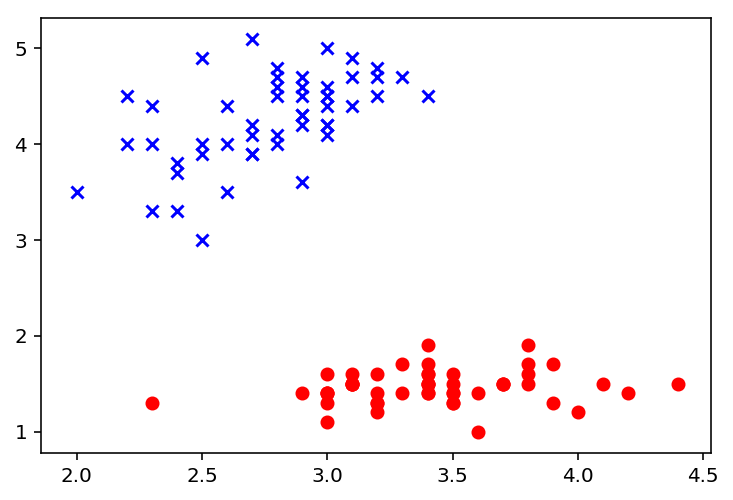

In [2]:
plt.scatter(X[y == -1, 1], X[y == -1, 2], marker='o', color='red')
plt.scatter(X[y == 1, 1], X[y == 1, 2], marker='x', color='blue')
plt.show()

In [3]:
from perceptron import Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X[:, [1, 2]], y)
# 从第 4 次迭代开始，就分类正确了
ppn.errors_

[0. 0. 0.]
迭代次数 0
迭代次数 1
迭代次数 2
迭代次数 3
迭代次数 4
迭代次数 5
迭代次数 6
迭代次数 7
迭代次数 8
迭代次数 9


[2, 2, 1, 0, 0, 0, 0, 0, 0, 0]

## 绘制决策边界

In [4]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


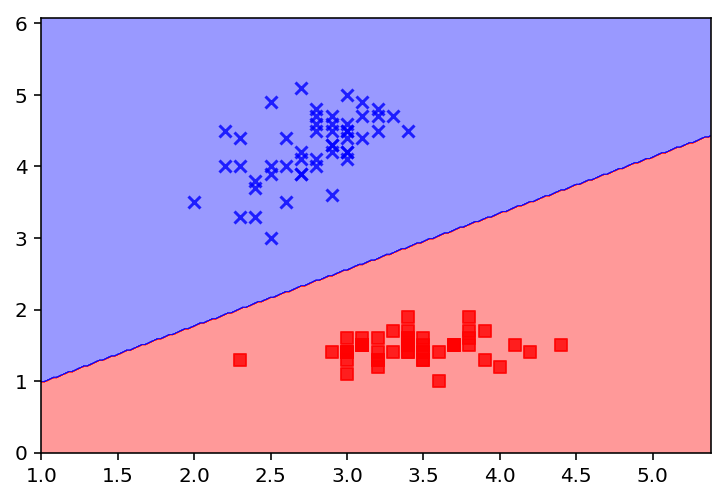

In [5]:
plot_decision_regions(X[:, [1, 2]], y, classifier=ppn)
plt.show()

## 说明

1、这里鸢尾花数据集的特征已经在相同量纲范围内，所以无须归一化，但是**在一般情况下，使用梯度下降法进行训练的时候，都要做特征归一化；

2、感知机算法使用的前提是数据集线性可分，如果数据集不是线性可分的，感知机算法不能收敛。